In [643]:
import pandas as pd #---> pandas
import numpy as np #---> numpy
from scipy.io import mmread #---> per leggere file .mtx

In [644]:
from stracca_module import metrics as stracca # my module to make some things as import matrices

# Structure of the M matrix

In [645]:
# import matrices
A = stracca.importazione_M(num_az=0, Y_start = 1980, Y_end = 2014, method = 'all', binarized = True, T = 0)

all firms


In [647]:
# sum all matrices to show some structures
ATOT = np.zeros((A[1980].shape[0],A[1980].shape[1]))
for i in range(1980,2014+1):
    ATOT = ATOT + A[i]
ATOT[ATOT!=0] = 1

In [661]:
AO = ATOT
# sort by row (the first row will be the city with more tc not 0)
M = AO[(AO == 0).sum(axis=1).ravel().argsort()]
# idem by columns
M = M.T[(M.T == 0).sum(axis=1).ravel().argsort()].T

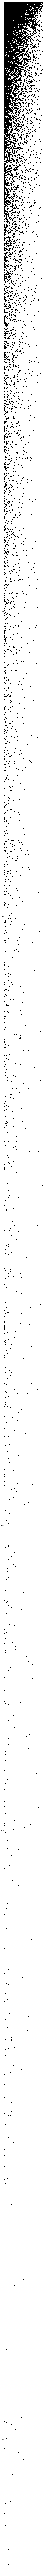

In [664]:
#visualize
import matplotlib.pylab as plt
import scipy.sparse as sparse
plt.figure(figsize=(8,500))
plt.spy(M)

The matrix appears to be triangular

In [104]:
# RCA
A = stracca.importazione_M(num_az=0, Y_start = 1980, Y_end = 2014, method = 'all', binarized = False, T = 0)
ATOT = np.zeros((A[1980].shape[0],A[1980].shape[1]))
for i in range(1980,2014+1):
    ATOT = ATOT + A[i]

RCAtot = ((ATOT/(np.sum(ATOT,axis=1)).reshape((np.sum(ATOT,axis=1).shape[0],1)))/
          ((np.sum(ATOT,axis=0))/(np.sum(np.sum(ATOT)))))
RCAtot = np.nan_to_num(RCAtot)
M = np.zeros((RCAtot.shape[0],RCAtot.shape[1]))
M[RCAtot > 0] = 1
M[RCAtot <= 0] = 0
M = M[(M == 0).sum(axis=1).ravel().argsort()]
M = M.T[(M.T == 0).sum(axis=1).ravel().argsort()].T
#visualize
plt.figure(figsize=(80,500))
plt.spy(M)

all firms


/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


# Display num_tec as a function of num_city

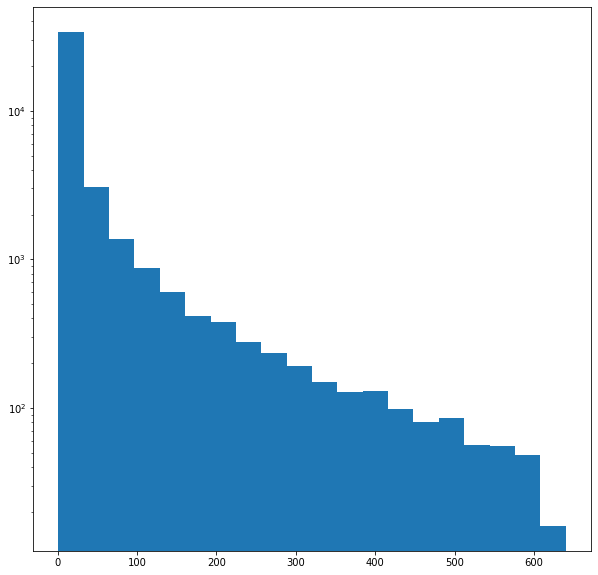

In [665]:
num_city = M.shape[0]
num_tec = M.shape[1]
np.sum(M,axis=1).shape
plt.figure(figsize=(10,10))
counts, bins = np.histogram(np.sum(M,axis=1), bins=20)
plt.hist(bins[:-1], bins, weights=counts)
plt.gca().set_yscale("log")

# Cities' fitness using technologies

## Importante: trovare dati riguardo GDP delle citta'

In [850]:
# import M and reorder
year = 2000
A = stracca.importazione_M(num_az=0, Y_start = 1980, Y_end = 2014, method = 'all', binarized = True, T = 0)
AO = A[year]
# sort by row and by columns
M = AO[(AO == 0).sum(axis=1).ravel().argsort()]
M = M.T[(M.T == 0).sum(axis=1).ravel().argsort()].T

all firms


## $\cases{\tilde{F}_c^{(n+1)} = \sum_t{M_{ct}Q^{(n)}_t}\\ \tilde{Q}_t^{(n+1)} = \frac{1}{\sum_c{\frac{M_{ct}}{F^{(n)}_c}}}}$ with normalization for each step $n$: $\cases{F^n_c = \frac{\tilde{F}_c^n}{\left<\tilde{F}\right>_c}\\ Q_t^n = \frac{\tilde{Q}_t^n}{\left<\tilde{Q}\right>_t}}$ and initial conditions $Q_t^{(0)} = 1\ \forall t$,  $F_c^{(0)} = 1\ \forall c$

In [851]:
# import list of cities reorded by diversification
city = pd.read_csv('cities_list.csv',delimiter=',', index_col=False, header=None)
city = np.unique(np.asarray(city))
city = np.array([x for _,x in sorted(zip(np.sum(AO,axis=1),city), reverse=True)])

In [852]:
#Nel paper 'sulla convergenza dell'algoritmo Fitness and Complexity' viene spiegato come ci siano dei paesi
#che fanno si che la fitness converga a zero. Questo e' dovuto alla presenza di citta' (nel nostro caso) che
# non fanno nulla in un determinato anno. Tali citta', per ogni anno, vanno tolte fino a quando non si ha una
# convergenza diversa da 0 della Fitness F e della complessita' Q.
# Per maggiori info: https://arxiv.org/pdf/1410.0249.pdf

# We have to delite the cities that do nothing and then the less diversified cities that tend to zero fitness
#and the tecnologies never made
#m = m[0:np.where(np.sum(m,axis=1)==0)[0][0],0:np.where(np.sum(m,axis=0)==0)[0][0]]
num_cities = 600
m = M[0:num_cities,:]
m = m[:, 0:np.where(np.sum(m,axis=0)==0)[0][0]-1]
city = city[0:num_cities]

In [853]:
n = 500 #number of steps
#for year in range(1980,2014+1): #--> quando faro' per ogni anno
F = np.ones((m.shape[0]))
Q = np.ones((m.shape[1]))
time=F
for n in range(1,massimo):
    F = np.dot(m,Q)
    Q =1/np.sum((m)/time[:,None],axis=0)
    Q =Q/(np.mean(Q))
    F = F/(np.mean(F))
    F = np.nan_to_num(F)
    time = F
    print('Classifica per fitness %i' %n)
    print(city[sorted(range(len(F)), key=lambda k: F[k],reverse=True)[0:10]])
    print('Fitness della classifica %i' %n)
    print(np.round(F[sorted(range(len(F)), key=lambda k: F[k],reverse=True)[0:10]],2))
    print('Complexity della classifica %i' %n)
    print(np.round(Q[sorted(range(len(Q)), key=lambda k: Q[k],reverse=True)[0:10]],2))
print('CLASSIFICA FINALE')
print(city[sorted(range(len(F)), key=lambda k: F[k],reverse=True)[0:10]])

Classifica per fitness 1
['Tokyo' 'Osaka' 'Seoul' 'Yokohama' 'Nagoya' 'Kobe' 'Kyoto' 'Paris'
 'Los Angeles' 'Beijing']
Fitness della classifica 1
[4.16 3.89 3.58 3.22 3.2  3.13 3.01 2.95 2.92 2.83]
Complexity della classifica 1
[34.87 34.87 34.87 34.87 17.43 17.43 11.62  8.72  8.72  8.72]
Classifica per fitness 2
['Tokyo' 'Osaka' 'Seoul' 'Yokohama' 'Nagoya' 'Kobe' 'Kyoto' 'Paris'
 'Beijing' 'Los Angeles']
Fitness della classifica 2
[10.77  8.43  6.34  5.    4.88  4.86  4.46  4.28  4.26  4.17]
Complexity della classifica 2
[54.87 43.97 40.52 18.3  16.9  13.97 12.48 10.25  9.43  7.17]
Classifica per fitness 3
['Tokyo' 'Osaka' 'Seoul' 'Yokohama' 'Nagoya' 'Kobe' 'Kyoto' 'Paris'
 'Beijing' 'Los Angeles']
Fitness della classifica 3
[12.21  9.27  6.87  5.44  5.19  5.18  4.81  4.59  4.57  4.42]
Complexity della classifica 3
[70.09 55.93 55.51 29.67 22.45 16.84 12.41 11.26  9.94  7.44]
Classifica per fitness 4
['Tokyo' 'Osaka' 'Seoul' 'Yokohama' 'Kobe' 'Nagoya' 'Hamburg' 'Kyoto'
 'Beijing' 'Par

[25.62 18.23 17.21 12.88  9.44  6.71  5.29  4.89  4.87  4.61]
Complexity della classifica 37
[192.15 137.45 129.54  30.76  11.21   7.42   4.8    4.23   4.08   2.93]
Classifica per fitness 38
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Yokohama' 'Nagoya'
 'Kobe' 'Kyoto']
Fitness della classifica 38
[26.01 18.6  17.53 12.85  9.42  6.69  5.27  4.88  4.85  4.6 ]
Complexity della classifica 38
[193.61 137.78 130.09  29.36  11.14   7.37   4.77   4.2    4.06   2.91]
Classifica per fitness 39
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Yokohama' 'Nagoya'
 'Kobe' 'Kyoto']
Fitness della classifica 39
[26.33 18.74 17.69 12.84  9.41  6.69  5.27  4.87  4.85  4.59]
Complexity della classifica 39
[193.62 138.44 130.45  30.8   10.94   7.24   4.69   4.13   3.99   2.86]
Classifica per fitness 40
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Yokohama' 'Nagoya'
 'Kobe' 'Kyoto']
Fitness della classifica 40
[26.7  19.09 17.98 12.81  9.39  6.67  5.26  4.86  4.84  4.58]
Compl

[208.26 148.18 139.4   30.83   8.29   5.48   3.55   3.13   3.02   2.17]
Classifica per fitness 87
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 87
[35.53 25.28 23.78 12.28  9.    6.4   5.26  5.04  4.66  4.64]
Complexity della classifica 87
[208.2  148.28 139.44  31.15   8.26   5.46   3.54   3.11   3.01   2.16]
Classifica per fitness 88
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 88
[35.62 25.37 23.86 12.28  9.    6.39  5.33  5.04  4.66  4.64]
Complexity della classifica 88
[208.48 148.34 139.54  30.85   8.25   5.46   3.53   3.11   3.     2.15]
Classifica per fitness 89
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 89
[35.71 25.41 23.9  12.27  9.    6.39  5.28  5.04  4.66  4.64]
Complexity della classifica 89
[208.43 148.44 139.58  31.15   8.22   5.44   3.52   3.1   

Classifica per fitness 131
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 131
[37.99 27.03 25.41 12.14  8.89  6.32  5.6   4.98  4.61  4.58]
Complexity della classifica 131
[211.11 150.25 141.24  31.22   7.72   5.11   3.31   2.91   2.81   2.02]
Classifica per fitness 132
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 132
[38.02 27.06 25.44 12.13  8.89  6.32  5.62  4.98  4.61  4.58]
Complexity della classifica 132
[211.2  150.27 141.27  31.13   7.72   5.11   3.31   2.91   2.81   2.02]
Classifica per fitness 133
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 133
[38.05 27.07 25.45 12.13  8.89  6.32  5.61  4.98  4.6   4.58]
Complexity della classifica 133
[211.18 150.3  141.28  31.22   7.71   5.1    3.3    2.91   2.81   2.01]
Classifica per fitness 134
['Hamburg' 'Espoo' 'St

Classifica per fitness 171
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 171
[38.74 27.56 25.91 12.09  8.86  6.29  5.7   4.96  4.59  4.57]
Complexity della classifica 171
[211.94 150.81 141.76  31.24   7.57   5.01   3.24   2.85   2.76   1.98]
Classifica per fitness 172
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 172
[38.75 27.57 25.92 12.09  8.86  6.29  5.71  4.96  4.59  4.57]
Complexity della classifica 172
[211.97 150.82 141.77  31.2    7.57   5.01   3.24   2.85   2.76   1.98]
Classifica per fitness 173
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 173
[38.76 27.58 25.92 12.09  8.86  6.29  5.71  4.96  4.59  4.57]
Complexity della classifica 173
[211.96 150.83 141.77  31.24   7.56   5.     3.24   2.85   2.76   1.98]
Classifica per fitness 174
['Hamburg' 'Espoo' 'St

Classifica per fitness 234
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 234
[39.08 27.81 26.14 12.07  8.85  6.28  5.75  4.95  4.58  4.56]
Complexity della classifica 234
[212.31 151.06 141.99  31.24   7.5    4.96   3.21   2.83   2.73   1.96]
Classifica per fitness 235
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 235
[39.08 27.81 26.14 12.07  8.85  6.28  5.75  4.95  4.58  4.56]
Complexity della classifica 235
[212.31 151.06 141.99  31.24   7.5    4.96   3.21   2.83   2.73   1.96]
Classifica per fitness 236
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 236
[39.08 27.81 26.14 12.07  8.85  6.28  5.75  4.95  4.58  4.56]
Complexity della classifica 236
[212.31 151.06 141.99  31.24   7.5    4.96   3.21   2.83   2.73   1.96]
Classifica per fitness 237
['Hamburg' 'Espoo' 'St

Classifica per fitness 266
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 266
[39.13 27.84 26.17 12.07  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 266
[212.36 151.09 142.02  31.24   7.49   4.96   3.21   2.83   2.73   1.96]
Classifica per fitness 267
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 267
[39.13 27.84 26.17 12.07  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 267
[212.36 151.1  142.02  31.25   7.49   4.96   3.21   2.83   2.73   1.96]
Classifica per fitness 268
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 268
[39.13 27.84 26.17 12.07  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 268
[212.36 151.1  142.02  31.24   7.49   4.96   3.21   2.82   2.73   1.96]
Classifica per fitness 269
['Hamburg' 'Espoo' 'St

Classifica per fitness 313
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 313
[39.15 27.86 26.18 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 313
[212.38 151.11 142.04  31.25   7.49   4.95   3.21   2.82   2.73   1.96]
Classifica per fitness 314
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 314
[39.15 27.86 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 314
[212.39 151.11 142.04  31.24   7.49   4.95   3.21   2.82   2.73   1.96]
Classifica per fitness 315
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 315
[39.15 27.86 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 315
[212.39 151.11 142.04  31.25   7.49   4.95   3.21   2.82   2.73   1.96]
Classifica per fitness 316
['Hamburg' 'Espoo' 'St

 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 343
[39.16 27.86 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 343
[212.39 151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 344
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 344
[39.16 27.86 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 344
[212.39 151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 345
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 345
[39.16 27.86 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 345
[212.39 151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 346
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classi

Classifica per fitness 371
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 371
[39.16 27.86 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 371
[212.39 151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 372
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 372
[39.16 27.87 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 372
[212.39 151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 373
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 373
[39.16 27.87 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 373
[212.39 151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 374
['Hamburg' 'Espoo' 'St

Classifica per fitness 405
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 405
[39.16 27.87 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 405
[212.4  151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 406
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 406
[39.16 27.87 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 406
[212.4  151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 407
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 407
[39.16 27.87 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 407
[212.4  151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 408
['Hamburg' 'Espoo' 'St

Classifica per fitness 438
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 438
[39.17 27.87 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 438
[212.4  151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 439
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 439
[39.17 27.87 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 439
[212.4  151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 440
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 440
[39.17 27.87 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 440
[212.4  151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 441
['Hamburg' 'Espoo' 'St

Complexity della classifica 467
[212.4  151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 468
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 468
[39.17 27.87 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 468
[212.4  151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 469
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 469
[39.17 27.87 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 469
[212.4  151.12 142.04  31.25   7.48   4.95   3.21   2.82   2.73   1.95]
Classifica per fitness 470
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']
Fitness della classifica 470
[39.17 27.87 26.19 12.06  8.84  6.28  5.76  4.95  4.58  4.56]
Complexity della classifica 470
[212.4  151.12 14

CLASSIFICA FINALE 2000 primi 10
['Hamburg' 'Espoo' 'Stockholm' 'Tokyo' 'Osaka' 'Seoul' 'Gamagōri'
 'Yokohama' 'Nagoya' 'Kobe']

CLASSIFICA FINALE 1980 primi 10
['Milano' 'Tokyo' 'Frankfurt am Main' 'Kawasaki' 'Osaka' 'Paris' 'Taitō'
 'New York' 'Allegheny' 'London']